# Лабораторная работа №3   
### «Цифровой спектральный анализ детерминированных сигналов».  
### Выполнил студент ФРКТ группы Б01-908  
### Зайцев Василий

## Task 1.  ДПФ и спектральный анализ.

In [7]:
import numpy as np # импорт бибилиотеки numpy
import matplotlib.pyplot as plt # импорт модуля matplotlib.pyplot
from scipy import signal
import scipy.io.wavfile
from scipy import signal
from IPython.display import Audio
%matplotlib notebook
def DTFT(x, M=None):
    """
    Функция вычисляет значения ДВПФ в M точках на отрезке 
    по оси нормированных частот [-0.5; 0.5]

    Parameters
    ----------
    x : complex
        входная последовательность отсчетов, первый отсчет при k=0
    M : int
        количество точек на отрезке [-0.5; 0.5]

    Returns
    -------
    float
        значения оси нормированных частот, 
        соответствующих вычисленным значениям
        спектральной функции  
    complex
        значения спектральной функции      
    """
    if M is None:
        M=16*x.size
    return (-0.5+(np.arange(M)/M), np.fft.fftshift(np.fft.fft(x, M)))

## Task 1.1 Частотная ось ДПФ.

<IPython.core.display.Javascript object>


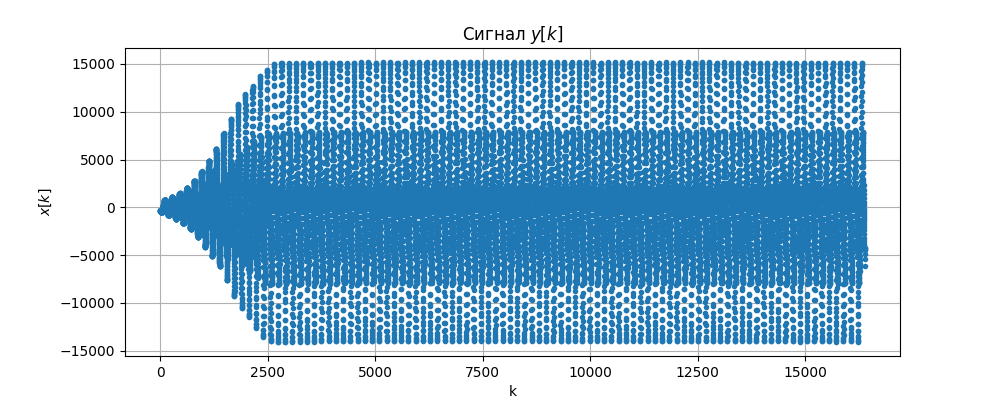

In [8]:
# Variant 5
fs, x = scipy.io.wavfile.read('clarinet.wav')
Audio('clarinet.wav')

a = 16000
y = x[a : a + 2**14]
plt.figure(figsize=[10, 4])
plt.plot(np.arange(y.size), y, '.')
plt.grid()
plt.title("Cигнал $y[k]$")
plt.xlabel("k")
plt.ylabel("$x[k]$")
plt.show()


<IPython.core.display.Javascript object>


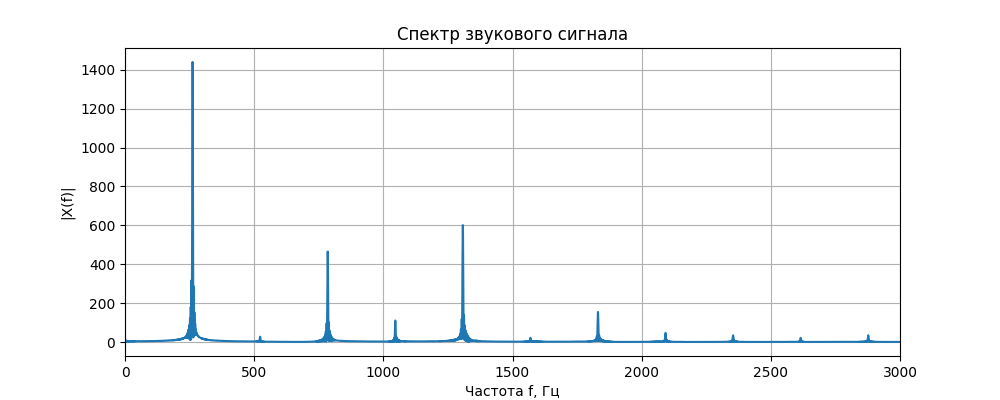

In [9]:
plt.figure(figsize=[10, 4])
plt.title("Спектр звукового сигнала")

nu, Xf = DTFT(y, M=2**18)
plt.plot(nu*fs, abs(Xf)/fs, '-')
plt.xlim([0, 3000])
plt.grid()
plt.xlabel("Частота f, Гц")
plt.ylabel("|X(f)|");

Основные гармонические компоненты: 260 (основная) , 780, 1307 Гц.

<IPython.core.display.Javascript object>


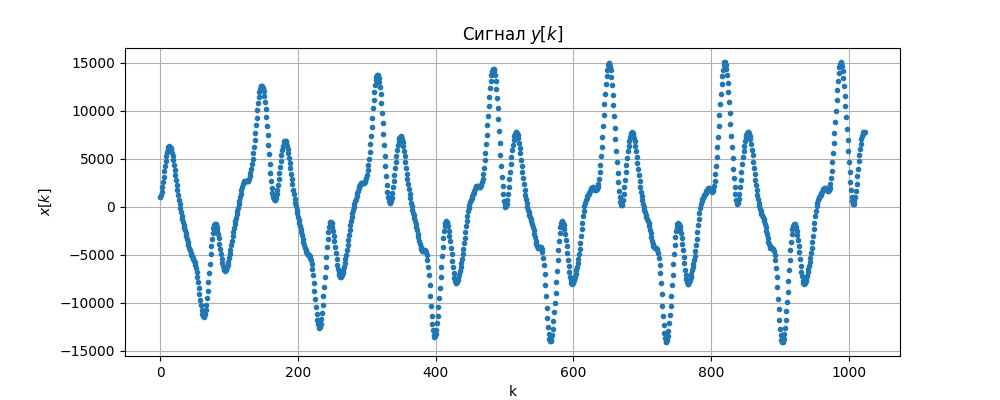

In [10]:
a = 18000
y = x[a : a + 2**10]
plt.figure(figsize=[10, 4])
plt.plot(np.arange(y.size), y, '.')
plt.grid()
plt.title("Cигнал $y[k]$")
plt.xlabel("k")
plt.ylabel("$x[k]$")
plt.show()

In [11]:
delta = 1 / ((314 - 147) * (1/fs))
delta2  =1 / ((181 - 149) * (1/fs))
delta
delta2

1378.125

Основная частота совпала с полученной в предыдущем пункте.

## Task 1.2 Задача распознавания спектральных компонент.

In [12]:
Nv=5
x = np.load('variant_%i_ex_1_2.npy' %Nv )
N = len(x)
Xn = np.fft.fft(x)
plt.figure(figsize=[10, 4])
plt.stem(np.arange(Xn.size), abs(Xn)/)
plt.ylabel("$\\tilde{X}[n]$")
plt.xlabel("$n$")
plt.tight_layout()
plt.grid()
plt.show()

SyntaxError: invalid syntax (<ipython-input-12-aebd6fe00233>, line 6)

<IPython.core.display.Javascript object>


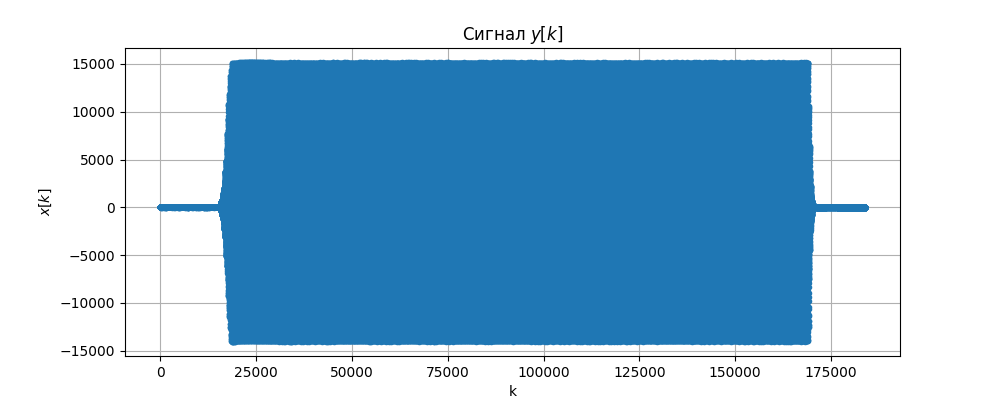

In [13]:
plt.figure(figsize=[10, 4])
plt.plot(np.arange(x.size), x, '.')
plt.grid()
plt.title("Cигнал $y[k]$")
plt.xlabel("k")
plt.ylabel("$x[k]$")
plt.show()

In [14]:
fi = lambda x: np.angle(x) + np.pi/2
print(f"Values:           {fi(Xn[14]), fi(Xn[20]), fi(Xn[24]) - 2 * np.pi}")
print(f"Reference values: {round(3*np.pi/4,14), round(-  np.pi/4,15), round(- np.pi/2,17)}")

NameError: name 'Xn' is not defined

| m  |$$A_m$$ | $$\phi_m$$ |
|:--:|:------:|:---:|
| 14 | 11     | $\dfrac{3\pi}{4}$ |
| 20 | 7      | $-\dfrac{\pi}{4}$ |
| 24 | 10     | $-\dfrac{\pi}{2}$ |

# Task 2. Окна в спектральном анализе.

## Task 2.1 Исследование характеристик различных окон.

<IPython.core.display.Javascript object>


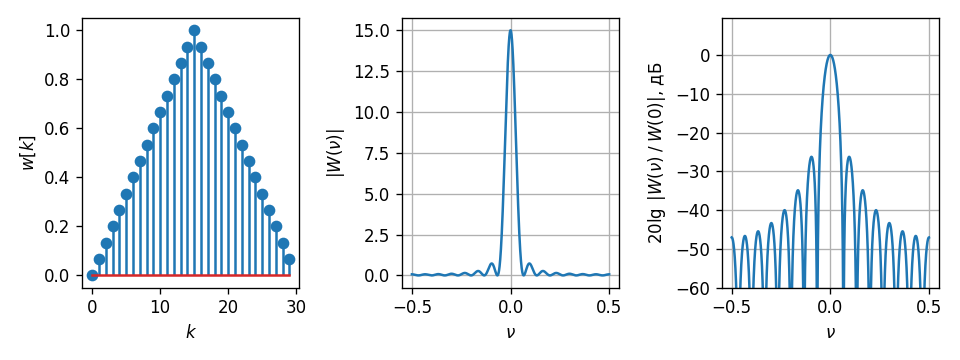

In [15]:
#Variant 5
N=20 + 2*5
#w=signal.windows.boxcar(M=N, sym=False)
w=signal.windows.bartlett(M=N, sym=False)
#w=signal.windows.hann(M=N, sym=False)
#w=signal.windows.hamming(M=N, sym=False)
#w=signal.windows.blackman(M=N, sym=False)
#w=scipy.signal.windows.flattop(M=N, sym=False)


plt.figure(figsize=[8, 3], dpi=120)

plt.subplot(1, 3, 1)
k=np.arange(N)
plt.stem(k, w)
plt.xlabel('$k$')
plt.ylabel('$w[k]$')

nu, Wn = DTFT(w, M=8*2048)

plt.subplot(1, 3, 2)
k=np.arange(N)
plt.plot(nu, abs(Wn))
plt.xlabel('$\\nu$')
plt.ylabel('$|W(\\nu)|$')
plt.grid()

plt.subplot(1, 3, 3)
k=np.arange(N)
plt.plot(nu, 20*np.log10(abs(Wn)/max(abs(Wn))))
plt.ylim(ymin=-60)
plt.grid()

plt.xlabel('$\\nu$')
plt.ylabel('$20 \lg \; |W(\\nu)\; / \;W(0)|$, дБ')
plt.tight_layout()


| Window  |$$\Delta\nu$$ | $$Уровень, Дб$$ | ассимтотическая скорость спада, Дб/октава |
|:--:|:------:|:---:|:---:|
| boxcar   | 0.029 (0.89/N) | -13.2 | 6  |
| bartlett |0.043 (1.28/N) | -26,5 | 9  |
| hann     | 0.048 (1.44/N) | -31,5 | 18  |
| hamming  | 0.045 (1.36/N) | -41 | 3  |
| blackman | 0.054 | -58.21 | 10  |
| flattop  | 0.124 | -80.25 | 1  |

## Task 2.2  Окно Кайзера

<IPython.core.display.Javascript object>


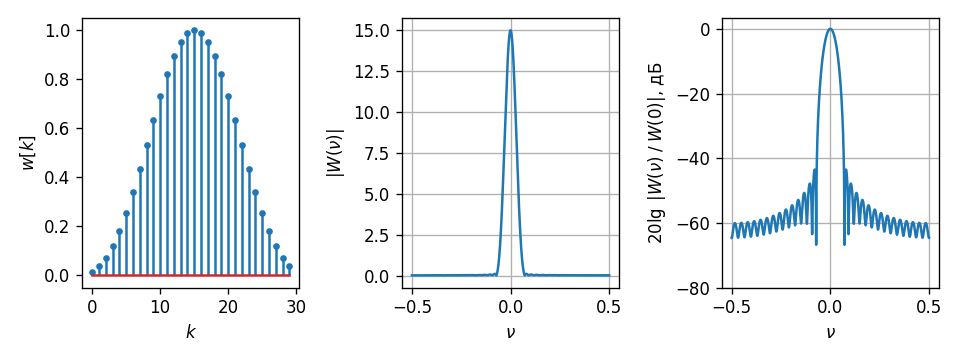

<ipython-input-16-e09fa6d1c340>:7: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(k, w, '-', '.')


In [16]:
w=scipy.signal.windows.kaiser(M=N, beta=6, sym=False)

plt.figure(figsize=[8, 3], dpi=120)

plt.subplot(1, 3, 1)
k=np.arange(N)
plt.stem(k, w, '-', '.')
plt.xlabel('$k$')
plt.ylabel('$w[k]$')

nu, Wn = DTFT(w, M=8*2048)

plt.subplot(1, 3, 2)
k=np.arange(N)
plt.plot(nu, abs(Wn))
plt.xlabel('$\\nu$')
plt.ylabel('$|W(\\nu)|$')
plt.grid()

plt.subplot(1, 3, 3)
k=np.arange(N)
plt.plot(nu, 20*np.log10(abs(Wn)/max(abs(Wn))))
plt.grid()
plt.ylim(ymin=-80)
plt.xlabel('$\\nu$')
plt.ylabel('$20 \lg \; |W(\\nu)\; / \;W(0)|$, дБ')
plt.tight_layout()

| $\beta$  |$$\Delta\nu$$ | $$Уровень, Дб$$ | ассимтотическая скорость спада, Дб/декада |
|:--:|:------:|:---:|:---:|
| 0   | 0.030 | -13.22 | 6  |
| 5 |0.045 | -36.46 | 12  |
| 6    | 0.048 | -43.52 | 9  |
| 8.6  | 0.052 | -64.83 | 6  |

## Task 2.3 Окно Чебышева.

<IPython.core.display.Javascript object>


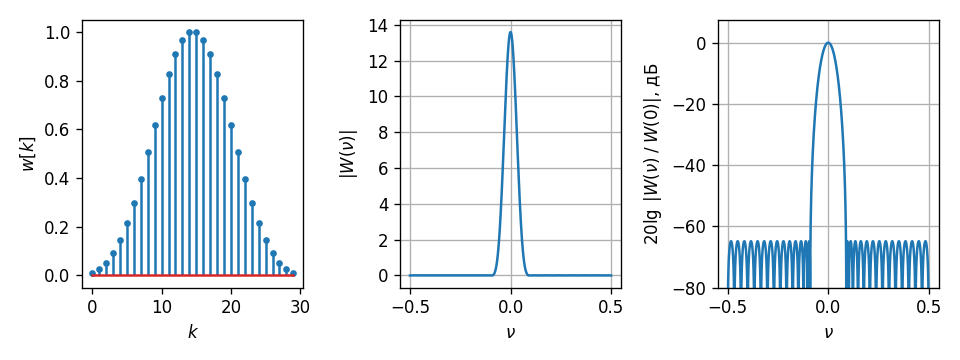

<ipython-input-17-427b43126abf>:7: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(k, w, '-', '.')
<ipython-input-17-427b43126abf>:22: RuntimeWarning: divide by zero encountered in log10
  plt.plot(nu, 20*np.log10(abs(Wn)/max(abs(Wn))))


In [17]:
w=signal.windows.chebwin(M=N, at=64.83, sym=True)

plt.figure(figsize=[8, 3], dpi=120)

plt.subplot(1, 3, 1)
k=np.arange(N)
plt.stem(k, w, '-', '.')
plt.xlabel('$k$')
plt.ylabel('$w[k]$')

nu, Wn = DTFT(w, M=8*2048)

plt.subplot(1, 3, 2)
k=np.arange(N)
plt.plot(nu, abs(Wn))
plt.xlabel('$\\nu$')
plt.ylabel('$|W(\\nu)|$')
plt.grid()

plt.subplot(1, 3, 3)
k=np.arange(N)
plt.plot(nu, 20*np.log10(abs(Wn)/max(abs(Wn))))
plt.grid()
plt.ylim(ymin=-80)
plt.xlabel('$\\nu$')
plt.ylabel('$20 \lg \; |W(\\nu)\; / \;W(0)|$, дБ')
plt.tight_layout()

| уровень, Дб |$$\Delta\nu$$ |
|:-------:|:------:|
| -13.22  | 0.026 |
| -36.46  | 0.040 |
| -43.52   | 0.043 |
| -64.83   | 0.051 |

Для окна Чебышева ширина главного лепестка на половинной мощности меньше, чем в других задачах при равных уровнях боковых лепестков

## Task 2.4 Различимость спектральных компонент.

<IPython.core.display.Javascript object>


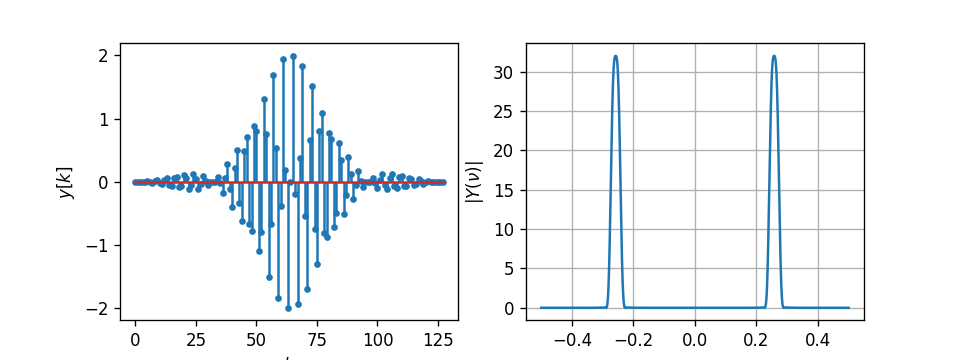

<ipython-input-18-67cd00a06a6d>:16: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(k, y, '-', '.')


In [18]:
#Variant 5
N=128
k=np.arange(N)
x=np.sin(2*np.pi*k*32/N)+np.sin(2*np.pi*k*34/N)

w1 =scipy.signal.windows.kaiser(M=N, beta=1.1, sym=False)
w2 =scipy.signal.windows.kaiser(M=N, beta=6.1, sym=False)
w3 =signal.windows.blackman(M=N, sym=False)

y = x * w3

plt.figure(figsize=[8, 3], dpi=120)

plt.subplot(1, 2, 1)
k=np.arange(N)
plt.stem(k, y, '-', '.')
plt.xlabel('$k$')
plt.ylabel('$y[k]$')

nu, Yn = DTFT(y, M=8*2048)

plt.subplot(1, 2, 2)
k=np.arange(N)
plt.plot(nu, abs(Yn))
plt.xlabel('$\\nu$')
plt.ylabel('$|Y(\\nu)|$')
plt.grid()

Для А) разлечимы полностью, для Б) почти не разлечимы, т.к. ширина главного  максимума не позваляет различить пики достаточно хорошо. В варианте В) не различимы совсем, так как ширина главного максимума больше расстояния между спектральными компонентами.  

Если уровни двух спектральных компонент сильно различны и больше уровня боковых лепестков, то вторую спектральную компоненту можно не различить

## Task 2.5 Маскировка слабой гармоники боковыми лепестками окна.

/home/vasilii/anaconda3/lib/python3.8/site-packages/scipy/signal/windows/windows.py:1436: UserWarning: This window is not suitable for spectral analysis for attenuation values lower than about 45dB because the equivalent noise bandwidth of a Chebyshev window does not grow monotonically with increasing sidelobe attenuation when the attenuation is smaller than about 45 dB.
  warnings.warn("This window is not suitable for spectral analysis "


<IPython.core.display.Javascript object>


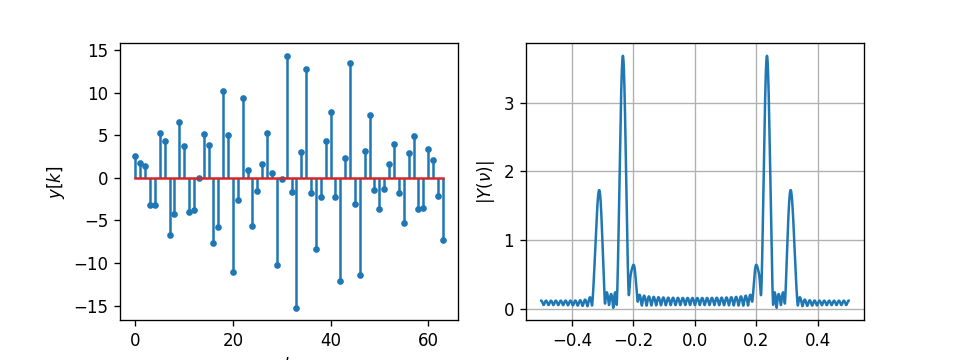

<ipython-input-19-4ff9cd6a86b2>:20: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(k, y, '-', '.')


In [19]:
n=15
m2 = -2
m3 = 5
N=64
k=np.arange(N)
x=n*np.sin(2*np.pi*k*n/N) + n/6 * np.cos(2*np.pi*k*(n+m2)/N)-n/2 * np.sin(2*np.pi*k*(n+m3)/N)

w1=scipy.signal.windows.boxcar(M=N, sym=False)
w2=signal.windows.blackman(M=N, sym=False)
w3=scipy.signal.windows.bartlett(M=N, sym=False)
w4 =scipy.signal.windows.kaiser(M=N, beta=3.5, sym=False)
w5=signal.windows.chebwin(M=N, at=25, sym=True)

y = x * w5

plt.figure(figsize=[8, 3], dpi=120)

plt.subplot(1, 2, 1)
k=np.arange(N)
plt.stem(k, y, '-', '.')
plt.xlabel('$k$')
plt.ylabel('$y[k]$')

nu, Yn = DTFT(y, M=8*2048)

plt.subplot(1, 2, 2)
k=np.arange(N)
plt.plot(nu, abs(Yn)/N)
plt.xlabel('$\\nu$')
plt.ylabel('$|Y(\\nu)|$')
plt.grid()

Спектральные компоненты:  
а)15/64 = 0.234,  
б)12/64 = 0.1875, (-15 Дб от компоненты А)  
в)20/64 = 0.3125  

Для прямоугольного окна видны А и В, т.к. Б скрыта за боковыми лепестками  
Для окна Блэкмана видны А и В, т.к. Б скрыта из-за широкого главного пика  
Для окна Блэкмана видны А и В, и различима Б, но она все равно скрыта за боковыми лепестками  
Для окна Чебышева и Кайзера были подобраны коэффициенты, чтобы А и Б были различимы

## Task 2.6 Амплитудная модуляция спектра.

<IPython.core.display.Javascript object>


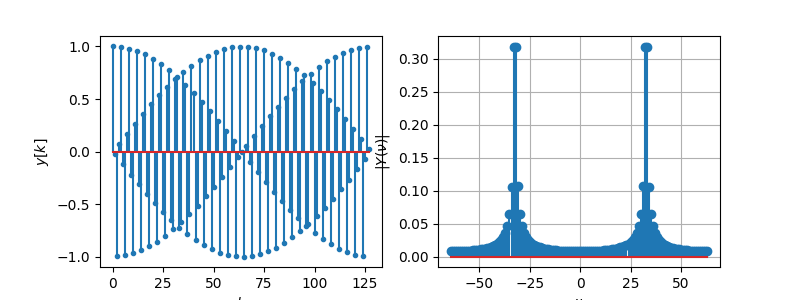

<ipython-input-20-dcd7dfae8cc8>:15: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(k, y, '-', '.')


<IPython.core.display.Javascript object>


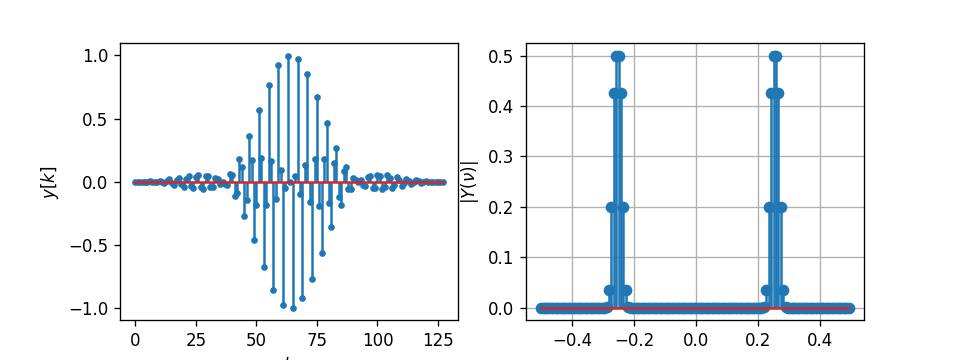

<ipython-input-20-dcd7dfae8cc8>:34: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(k, y, '-', '.')


In [20]:
n=32.5
N=128
k=np.arange(N)
x=np.cos(2*np.pi*k*n/N)

w1=scipy.signal.windows.boxcar(M=N, sym=False)
w2=signal.windows.flattop(M=N, sym=False)

y = x * w1

plt.figure(figsize=[8, 3])

plt.subplot(1, 2, 1)
k=np.arange(N)
plt.stem(k, y, '-', '.')
plt.xlabel('$k$')
plt.ylabel('$y[k]$')

nu, Yn = DTFT(y, M=128)

plt.subplot(1, 2, 2)
k=np.arange(N)
plt.stem(np.arange(Yn.size)-N//2, abs(Yn)/sum(w1))
plt.xlabel('$\\nu$')
plt.ylabel('$|Y(\\nu)|$')
plt.grid()

y = x * w2

plt.figure(figsize=[8, 3], dpi=120)

plt.subplot(1, 2, 1)
k=np.arange(N)
plt.stem(k, y, '-', '.')
plt.xlabel('$k$')
plt.ylabel('$y[k]$')

nu, Yn = DTFT(y, M=128)

plt.subplot(1, 2, 2)
k=np.arange(N)
plt.stem(nu, abs(Yn)/sum(w2))
plt.xlabel('$\\nu$')
plt.ylabel('$|Y(\\nu)|$')
plt.grid()

Для прямоугольного окна амплитуды гармоник: 0.31824 и 0.31842  
Для плоского окна амплитуды гармоник: 0.49942 и 0.49947

# Task 3 Кратковременное дискретное преобразование Фурье (STFT)

## Task 3.1 Спектрограмма аудиофайла.

In [21]:
fs, x = scipy.io.wavfile.read('major_scale_flute3.wav')
print(f"{round(len(x) /fs,2)} seconds")
Audio('major_scale_flute3.wav')

17.17 seconds


In [22]:
plt.rc('font', size=12) 
import warnings
warnings.filterwarnings('ignore')


nperseg = 15000;
noverlap=0
f, t, Zxx = signal.stft(x, fs=fs, window=('blackman'), nperseg=nperseg, noverlap=noverlap, nfft=2**16)
plt.figure(figsize=[13.5, 5], num='H = %i' % (nperseg-noverlap), dpi=70)
plt.pcolormesh(t, f,  20*np.log10(np.abs(Zxx)/np.max(abs(Zxx))), vmin=-60, cmap=plt.get_cmap('inferno'), shading='flat')
plt.colorbar()
plt.ylim((0, 6000))
plt.xlim((2, 16))
plt.ylabel('Частота, Гц')
plt.xlabel('Время, с')
plt.tight_layout()
print(f"Размер кадра: {round((nperseg)/fs, 2)} seconds")

<IPython.core.display.Javascript object>

TypeError: Dimensions of C (32769, 56) are incompatible with X (56) and/or Y (32769); see help(pcolormesh)

По спектру мы можем видеть, как на флейте идут по нотам сначала вверх в область бОльших частот, затем в область меньших
Размер кадра: 0.31 с, соотносится с графиком  
Разрешение по времени: nperseg/fs~0.31c.
Разрешение по частате зависит от сетки ДПФ и Шириной главного лепестка оконной функции Δ𝑓  = 0.6Гц  

Меньше длина окна - больше разрешение по времени, меньше по частоте
Больше размерность ДПФ - больше разрешение по частоте  
Так же многое зависит от окна

## Task 3.2 Спектрограмма ЛЧМ сигнала.

In [23]:
fs = 2000
f0=120
f1=820
t=np.arange(0, 2, 1/fs)
x = signal.chirp(t, f0=f0, f1=f1, t1=2, method='linear')

f, t, Zxx = signal.stft(x, fs=fs, window=('boxcar'), nperseg=200, noverlap=32, nfft=10000)
plt.figure(figsize=[13.5, 5], dpi=70)
plt.pcolormesh(t, f, np.abs(Zxx)**2, cmap=plt.get_cmap('inferno'), shading='flat')
plt.colorbar()
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

TypeError: Dimensions of C (5001, 25) are incompatible with X (25) and/or Y (5001); see help(pcolormesh)

Больше длина кадра - Меньше разрешение по времени,больше по частоте  
От оконной функции зависит общий вид спектра (боковые лепестки, главный максимум)  
При увеличении размерности ДПФ увеличивается разрешение по частоте